# Ensemble Methods

### Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

### Read the data into pandas dataframe

In [2]:
## Column names for the data set

columns = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 
          'fractal_dimension']

cols = ['ID', 'Diagnosis']

for column in columns:
    cols.append(column +'_mean')

for column in columns:
    cols.append(column +'_se')   
    
for column in columns:
    cols.append(column +'_worst')
    
cols

['ID',
 'Diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [3]:
# read the dataset into pandas dataframe
df = pd.read_csv('wdbc.data', names = cols)
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# check the shape of the dataframe
df.shape

(569, 32)

In [5]:
## basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
## basic description about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


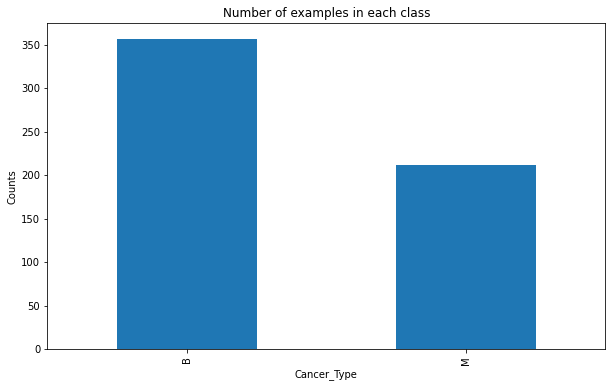

In [7]:
## Number of examples of each class
df.Diagnosis.value_counts().plot(kind = 'bar', title = 'Number of examples in each class', figsize = (10, 6),
                                 xlabel = 'Cancer_Type', ylabel = 'Counts');

### Let's plot the distribution of each column in the dataset

In [8]:
def plot_histogram(column_name):
    """ This function will plot the histogram of related columns in the dataset, i.e.(radius_mean, radius_se, radius_worst)
    
    Args: 
        column_name: dataframe column for plotting histogram
    """
    fig, ax = plt.subplots(1, 3, figsize = (14, 6))
    columns = [column_name + '_mean', column_name + '_se', column_name + '_worst']
    for i in range(3):
        sns.kdeplot(df[columns[i]], ax = ax[i], shade = True, color = 'r')
        
    fig.suptitle(f'Histogram of {column_name} columns', fontsize = 18)

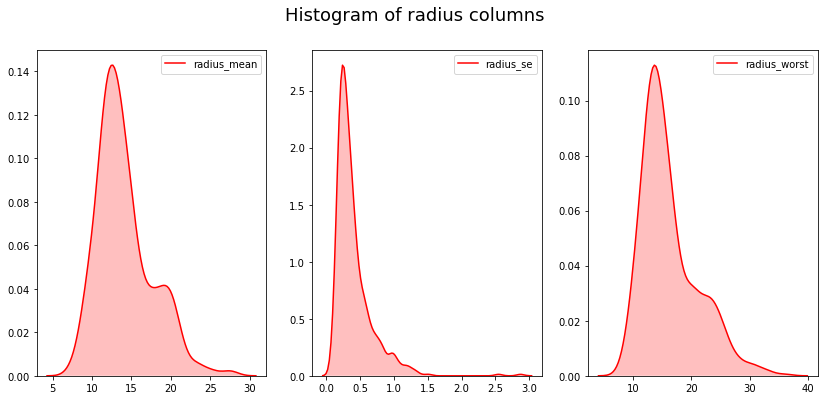

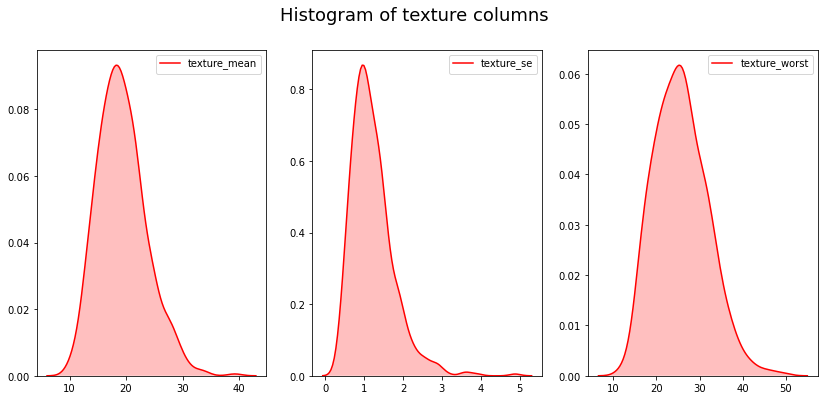

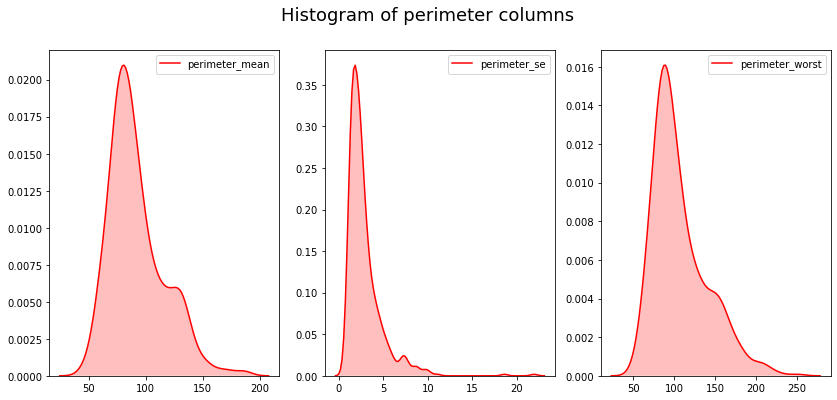

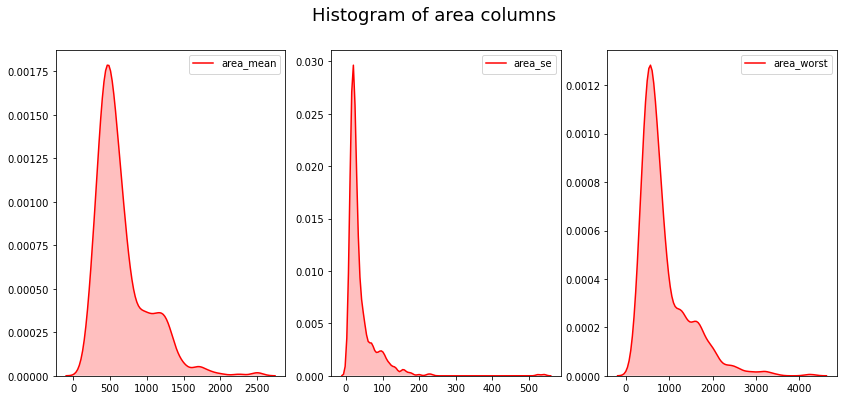

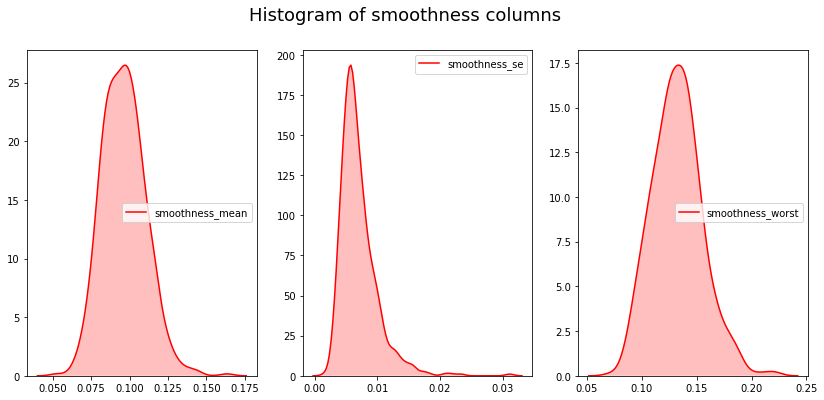

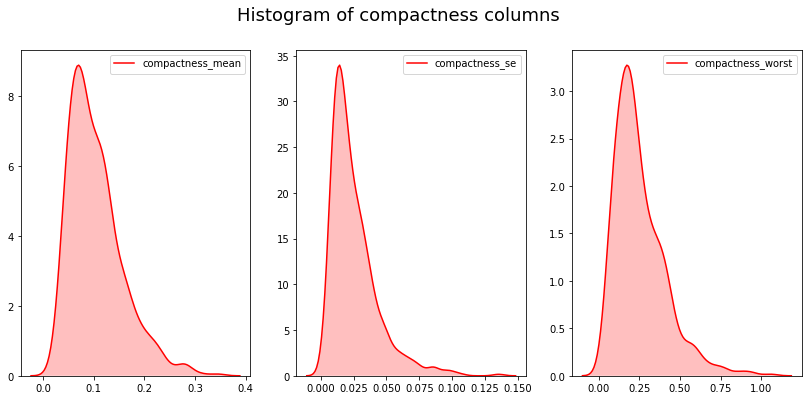

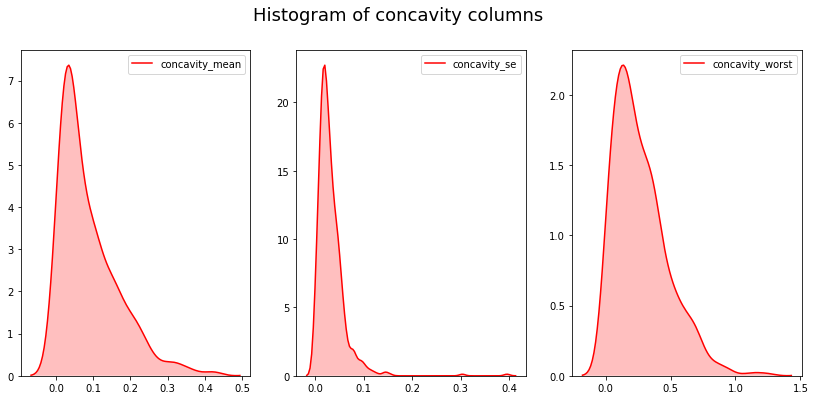

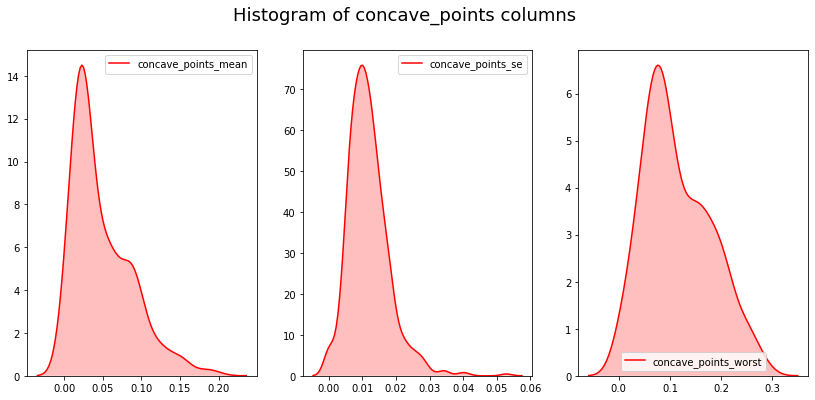

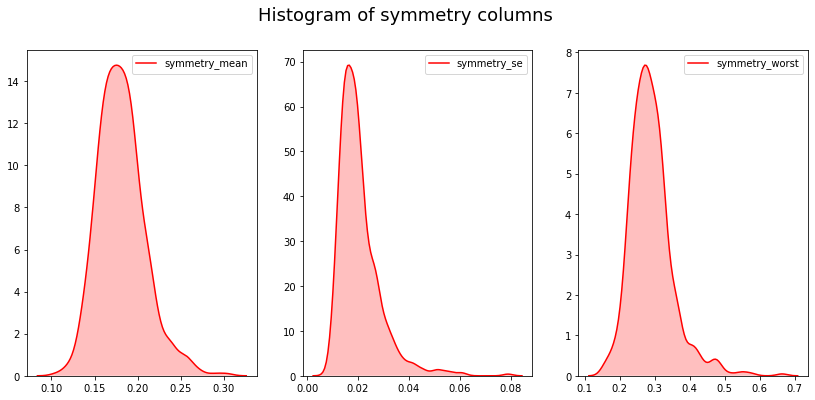

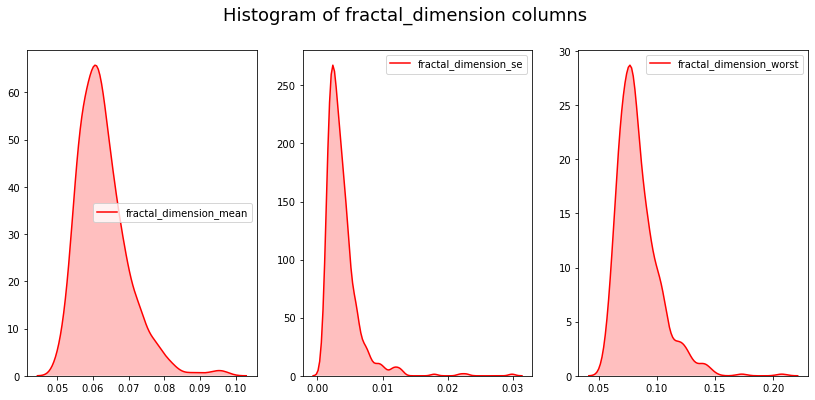

In [9]:
## Call the function to plot histograms
for col in columns:
    plot_histogram(col)

### Plot the correlation matrix to see the extent of correlations among the features quantitatively

In [10]:
random_state = np.random.RandomState(0)
corr = df.iloc[:, 2:].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


- As can be seen from the correlation matrix, some features have much higher correlation among them **(greater than 90%)**.
- perimeter_mean, area_mean, radius_worst, perimeter_worst and area_worst are highly correlated with radius_mean feature

### Check for the outliers using boxplot

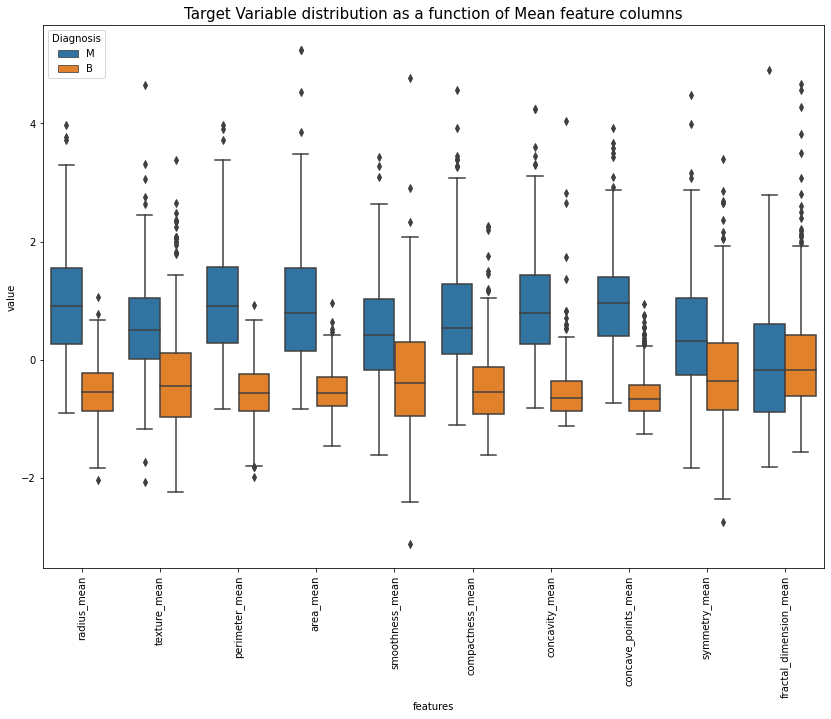

In [11]:
# Mean features of the dataset
data = (df.iloc[:, 2:] - df.iloc[:, 2:].mean()) / (df.iloc[:, 2:].std())      
data = pd.concat([df.Diagnosis, data.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name = 'value')

plt.figure(figsize = (14, 10))
sns.boxplot(x = "features", y = "value", hue = "Diagnosis", data = data)
plt.title('Target Variable distribution as a function of Mean feature columns', fontsize = 15)
plt.xticks(rotation = 90);

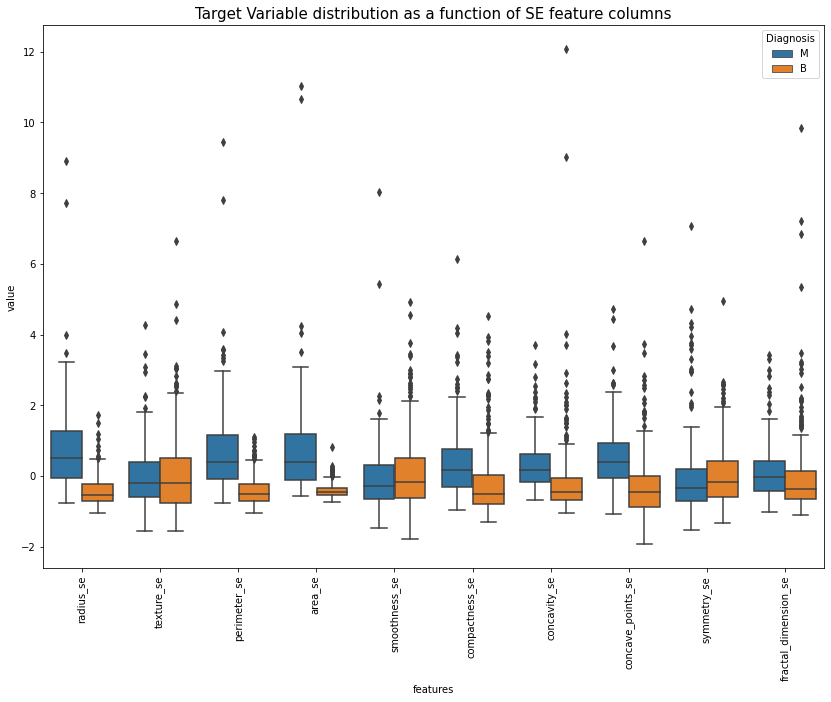

In [12]:
# SE features of the dataset
data = (df.iloc[:, 2:] - df.iloc[:, 2:].mean()) / (df.iloc[:, 2:].std())      
data = pd.concat([df.Diagnosis, data.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name = 'value')

plt.figure(figsize = (14, 10))
sns.boxplot(x = "features", y = "value", hue = "Diagnosis", data = data)
plt.title('Target Variable distribution as a function of SE feature columns', fontsize = 15)
plt.xticks(rotation = 90);

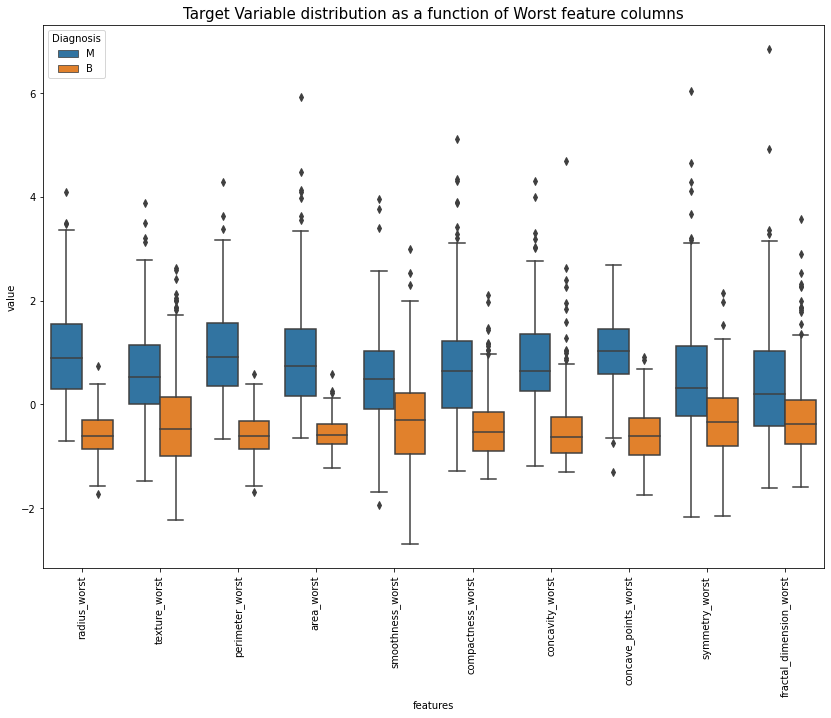

In [13]:
# Worst features of the dataset
data = (df.iloc[:, 2:] - df.iloc[:, 2:].mean()) / (df.iloc[:, 2:].std())      
data = pd.concat([df.Diagnosis, data.iloc[:, 20:30]], axis = 1)
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name = 'value')

plt.figure(figsize = (14, 10))
sns.boxplot(x = "features", y = "value", hue = "Diagnosis", data = data)
plt.title('Target Variable distribution as a function of Worst feature columns', fontsize = 15)
plt.xticks(rotation = 90);

### Observations from the box plots
- As can be seen from the above box plots, there are outliers present in most of the features in the dataset.
- **Standard Error features have most number of outliers**.
- Entries corresponding to Malignant have higher values as compared to Benign 

### Find the top correlations among the variables in the dataset

In [14]:
def filter_redundant_pairs(df):
    """ This function will filter the redundant pairs of correlated features in the dataset
        Args:
            df: dataframe
    """
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def top_correlations(df, n = 5):
    """ This function will return the top n correlated features in the dataset
        Args:
            df: dataframe
            n: number of correlated features to return 
    """
    au_corr = df.corr().abs().unstack()
    labels_to_drop = filter_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]


print("Top Absolute Correlations")
print(top_correlations(df.iloc[:, 2:], 20))

Top Absolute Correlations
radius_mean      perimeter_mean         0.997855
radius_worst     perimeter_worst        0.993708
radius_mean      area_mean              0.987357
perimeter_mean   area_mean              0.986507
radius_worst     area_worst             0.984015
perimeter_worst  area_worst             0.977578
radius_se        perimeter_se           0.972794
perimeter_mean   perimeter_worst        0.970387
radius_mean      radius_worst           0.969539
perimeter_mean   radius_worst           0.969476
radius_mean      perimeter_worst        0.965137
area_mean        radius_worst           0.962746
                 area_worst             0.959213
                 perimeter_worst        0.959120
radius_se        area_se                0.951830
perimeter_mean   area_worst             0.941550
radius_mean      area_worst             0.941082
perimeter_se     area_se                0.937655
concavity_mean   concave_points_mean    0.921391
texture_mean     texture_worst          0.9

### Split the data into train, test and validation set

In [15]:
# separate the target variable
target = df.Diagnosis

X, x_test, Y, y_test = train_test_split(df.iloc[:, 2:], target, test_size = 0.1, stratify = target, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 42)

print(f'Shape of x_train: {x_train.shape}\nShape of y_train is: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}\nShape of y_train is: {y_test.shape}')
print(f'Shape of x_val: {x_val.shape}\nShape of y_train is: {y_val.shape}')

Shape of x_train: (435, 30)
Shape of y_train is: (435,)
Shape of x_test: (57, 30)
Shape of y_train is: (57,)
Shape of x_val: (77, 30)
Shape of y_train is: (77,)


### Base line DecisionTreeClassifier model

In [16]:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(x_train, y_train)
tree_pred_baseline = tree_clf.predict(x_val)
confusion_matrix(y_val, tree_pred_baseline)

array([[47,  1],
       [ 6, 23]], dtype=int64)

In [17]:
print(f'Accuracy of baseline tree classifier is {accuracy_score(y_val, tree_pred_baseline)}')
print(f'F1 Score of baseline tree classifier is {f1_score(y_val, tree_pred_baseline, average = None)}')

Accuracy of baseline tree classifier is 0.9090909090909091
F1 Score of baseline tree classifier is [0.93069307 0.86792453]


### Base line RandomForestClassifier model

In [18]:
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(x_train, y_train)
rf_pred_baseline = rf_clf.predict(x_val)
confusion_matrix(y_val, rf_pred_baseline)

array([[48,  0],
       [ 2, 27]], dtype=int64)

In [19]:
print(f'Accuracy of baseline random forest classifier is {accuracy_score(y_val, rf_pred_baseline)}')
print(f'F1 Score of baseline random forest classifier is {f1_score(y_val, rf_pred_baseline, average = None)}')

Accuracy of baseline random forest classifier is 0.974025974025974
F1 Score of baseline random forest classifier is [0.97959184 0.96428571]


### 5 Fold Cross Validation on DecisionTreeClassifier

In [20]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

# create model
tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

# evaluate model
tree_scores = cross_val_score(tree_model, X, Y, scoring = 'accuracy', cv = cv, n_jobs = -1)

# report performance
print('Accuracy: %.3f' % (np.mean(tree_scores)))

Accuracy: 0.920


### 5 Fold Cross Validation on RandomForestClassifier

In [24]:
# create model
rf_model = RandomForestClassifier(random_state = 42)

# evaluate model
rf_scores = cross_val_score(rf_model, X, Y, scoring = 'accuracy', cv = cv, n_jobs = -1)

# report performance
print('Accuracy: %.3f' % (np.mean(rf_scores)))

Accuracy: 0.959


### Estimating the number of trees in RandomForestClassifier

In [26]:
accuracy = []   # to store the accuracy for each estimator

## iterate for the number of estimators
for estimator in range(1, 500):
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    rf_model = RandomForestClassifier(random_state = 42, n_estimators = estimator, n_jobs = -1)
    rf_scores = cross_val_score(rf_model, X, Y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    accuracy.append(np.mean(rf_scores))

### Plot the accuracy as a function of number of trees in the RandomForestClassifier

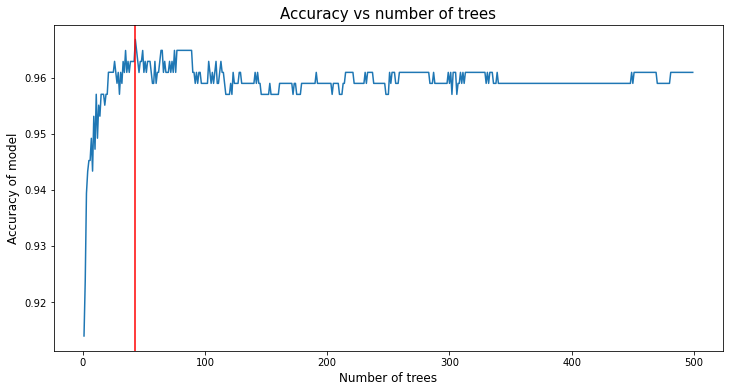

In [27]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.plot(list(range(1, 500)), accuracy)
ax.set_title('Accuracy vs number of trees', fontsize = 15)
ax.set_xlabel('Number of trees', fontsize = 12)
ax.set_ylabel('Accuracy of model', fontsize = 12)

# maximum accuracy line
ax.axvline(x = np.argmax(accuracy) + 1, color = 'r');

### Varying max features to observe its effect on accuracy

In [28]:
acc_max_feat = []   # to store accuracy for different max features

## iterate over the max features
for max_feat in range(1, 31):
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    rf_model = RandomForestClassifier(random_state = 42, n_estimators = 43, max_features = max_feat, n_jobs = -1)
    rf_scores = cross_val_score(rf_model, X, Y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    acc_max_feat.append(np.mean(rf_scores))

### Plot the accuracy as a function of max features in the RandomForestClassifier

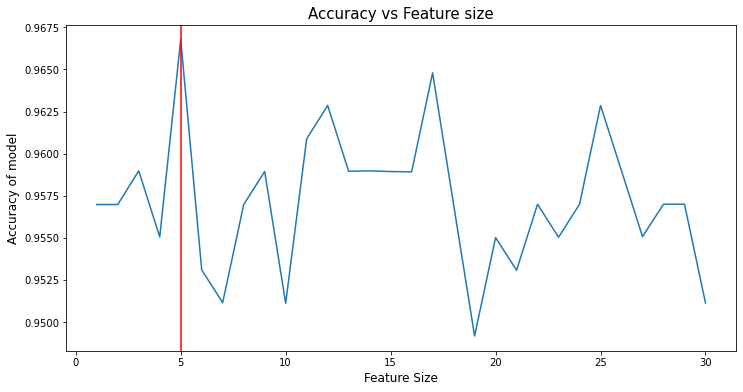

In [29]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.plot(list(range(1, 31)), acc_max_feat)
ax.set_title('Accuracy vs Feature size', fontsize = 15)
ax.set_xlabel('Feature Size', fontsize = 12)
ax.set_ylabel('Accuracy of model', fontsize = 12)

# maximum accuracy line
ax.axvline(x = np.argmax(acc_max_feat) + 1, color = 'r');

### Let's evaluate the performance RandomForest model on test data

In [31]:
rf_model = RandomForestClassifier(random_state = 42, n_estimators = 43, max_features = 5, n_jobs = -1)
rf_model.fit(X, Y)
test_pred = rf_model.predict(x_test)
print(f"Accuracy of random forest model on test data: {accuracy_score(y_test, test_pred)}")
confusion_matrix(y_test, test_pred)

Accuracy of random forest model on test data: 0.9824561403508771


array([[36,  0],
       [ 1, 20]], dtype=int64)

### Let's drop highly correlated features from the dataset

In [32]:
features_to_drop = ['perimeter_mean', 'perimeter_worst', 'perimeter_se', 'area_mean', 'area_se', 'area_worst', 'radius_worst', 
                    'radius_se', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 
                    'texture_worst', 'compactness_mean', 'compactness_worst', 'compactness_se']

new_df = df.drop(features_to_drop, axis = 1)
new_df.head()

,ID,Diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,0.11840,0.2419,0.07871,0.9053,0.006399,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,842517,M,20.57,17.77,0.08474,0.1812,0.05667,0.7339,0.005225,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,84300903,M,19.69,21.25,0.10960,0.2069,0.05999,0.7869,0.006150,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,84348301,M,11.42,20.38,0.14250,0.2597,0.09744,1.1560,0.009110,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,84358402,M,20.29,14.34,0.10030,0.1809,0.05883,0.7813,0.011490,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [33]:
# check the shape of the new data frame after dropping correlated features
new_df.shape

(569, 16)

### Check the correlation after dropping features from the dataset

In [34]:
random_state = np.random.RandomState(0)
new_corr = new_df.iloc[:, 2:].corr()
new_corr.style.background_gradient(cmap = 'coolwarm')

,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.170581,0.147741,-0.311631,-0.097317,-0.222600,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.163953,0.007066
texture_mean,0.323782,1.000000,-0.023389,0.071401,-0.076437,0.386358,0.006614,0.143293,0.163851,0.009127,0.054458,0.077503,0.105008,0.119205
smoothness_mean,0.170581,-0.023389,1.000000,0.557775,0.584792,0.068406,0.332375,0.248396,0.380676,0.200774,0.283607,0.805324,0.394309,0.499316
symmetry_mean,0.147741,0.071401,0.557775,1.000000,0.479921,0.128053,0.187321,0.342627,0.393298,0.449137,0.331786,0.426675,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,0.584792,0.479921,1.000000,0.164174,0.401964,0.446630,0.341198,0.345007,0.688132,0.504942,0.334019,0.767297
texture_se,-0.097317,0.386358,0.068406,0.128053,0.164174,1.000000,0.397243,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.128215,-0.045655
smoothness_se,-0.222600,0.006614,0.332375,0.187321,0.401964,0.397243,1.000000,0.268685,0.328429,0.413506,0.427374,0.314457,-0.107342,0.101480
concavity_se,0.194204,0.143293,0.248396,0.342627,0.446630,0.194998,0.268685,1.000000,0.771804,0.309429,0.727372,0.168481,0.197788,0.439329
concave_points_se,0.376169,0.163851,0.380676,0.393298,0.341198,0.230283,0.328429,0.771804,1.000000,0.312780,0.611044,0.215351,0.143116,0.310655
symmetry_se,-0.104321,0.009127,0.200774,0.449137,0.345007,0.411621,0.413506,0.309429,0.312780,1.000000,0.369078,-0.012662,0.389402,0.078079


### Prepare data with dropped features

In [35]:
# drop the features from train, test and validation data sets
X_new = X.drop(features_to_drop, axis = 1)
x_train_new = x_train.drop(features_to_drop, axis = 1)
x_test_new = x_test.drop(features_to_drop, axis = 1)
x_val_new = x_val.drop(features_to_drop, axis = 1)

### DecisionTree Classifier with dropped features 

In [36]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

# create model
new_tree_model = DecisionTreeClassifier(random_state = 42)

# evaluate model
new_tree_scores = cross_val_score(new_tree_model, X_new, Y, scoring = 'accuracy', cv = cv, n_jobs = -1)

# report performance
print('Accuracy: %.3f' % (np.mean(new_tree_scores)))

Accuracy: 0.918


### RandomForestClassifier with dropped features 

In [37]:
# create model
new_rf_model = RandomForestClassifier(random_state = 42)

# evaluate model
new_rf_scores = cross_val_score(new_rf_model, X_new, Y, scoring = 'accuracy', cv = cv, n_jobs = -1)

# report performance
print('Accuracy: %.3f' % (np.mean(new_rf_scores)))

Accuracy: 0.945


### Let's evaluate the performance RandomForest model on test data

In [46]:
rf_model = RandomForestClassifier(random_state = 42, n_estimators = 43, max_features = 5, n_jobs = -1)
rf_model.fit(X_new, Y)
test_pred = rf_model.predict(x_test_new)
print(f"Accuracy of random forest model on test data: {accuracy_score(y_test, test_pred)}")
confusion_matrix(y_test, test_pred)

Accuracy of random forest model on test data: 0.9649122807017544


array([[35,  1],
       [ 1, 20]], dtype=int64)

## Conclusion

#### Accuracy 
- Random Forest Classifier performed better than Decision Tree Classifier on this data set
- Accuracy of RandomForestClassifier on the test data without dropping any features from the dataset is 98.24 %.
- Accuracy of RandomForestClassifier on the test data after dropping correlated features from the dataset is 96.49%

- There are many features in the dataset that are highly correlated with each other.
- Dropping them didn't cause any significant loss in accuracy.

#### Outliers
- There are outliers present in most of the features in the dataset.
- The RandomForest model can be made more robust by removing outliers.